In [6]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def funkcje(numer):
    match numer:
        case 1:
            return "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17"
        case 2:
            return "math.sin(X1) + math.cos(X1)"
        case 3:
            return "2 * math.log(X1 + 1)"
        case 4:
            return "X1 + 2 * X2"
        case 5:
            return "math.sin(X1 / 2) + 2 * math.cos(X1)"
        case 6:
            return "X1**2 + 3 * X1 * X2 - 7 * X2 + 1"
        case _:
            return ""
        
def wyznaczenie_numeru_funkcji(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-4][-1]

def wyznaczenie_numeru_dziedziny(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-3][-1]

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wyznaczanie_kroku_funkcji(numer_funkcji, numer_dziedziny):
    match numer_funkcji:
        case 4:
            if numer_dziedziny == 3:
                return 1
            if numer_dziedziny == 4:
                return 10
        case 5:
            if numer_dziedziny>2:
                return 1
        case 6:
            if numer_dziedziny == 2:
                return 1
            if numer_dziedziny == 4:
                return 10
    
    return 0.1

In [8]:
def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji):
    x_axis = []
    y_axis = []
    y_original = []
    # krok = 0.1
    krok = 0.03
    i = int(p)
    koniec = int(k)
    funkcja_original = funkcje(nr_funkcji)
    # evaluacja funkcji do tablic
    while i < koniec:
        sin = math.sin
        cos = math.cos
        X1 = i
        if i == 0:  #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        y_original.append(eval(funkcja_original))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny):
    y_axis = []
    y_original = []
    x1_axis = []
    x2_axis = []
    krok = wyznaczanie_kroku_funkcji(nr_funkcji, nr_dziedziny)
    funkcja_original = funkcje(nr_funkcji)
    i = int(p)
    koniec = int(k)
    
    while i < koniec:
        j = int(p)
        X1 = i
        if i == 0: #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.00000001
        while j < koniec:
            X2 = j
            if j == 0:
                X2 = 0.00000001
            y_axis.append(eval(funkcja))
            y_original.append(eval(funkcja_original))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczenie_numeru_dziedziny(nazwa_pliku))
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()
        
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()
        
        return os.path.join(sciezka_docelowa, nazwa_obrazka)

In [9]:
def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = os.path.join(folder, "files", "done")
    folder_img = os.path.join(folder, "files", "img")
    
    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            # print(pelna_sciezka)
            nr_funkcji = int(wyznaczenie_numeru_funkcji(pelna_sciezka))
            if nr_funkcji<4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)
                
            # print(nazwa)
            
    return pliki_done

In [ ]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done zad1")

In [31]:
# x = "((X1 * cos ((X1  + (X1 * sin X1 )) - (3.0753746583620263 / 2.1505160546130666))) + (4.205075456405437 * cos (1.1998484260595044)))"
x = "((X1 * sin( (X1 * cos( -0.006381789714943409)))) + (((-3.306893758042727 * sin( ((-2.658438231207861 * sin( -0.006381789714943409)) / (X1 * sin( (X1 * cos( (-3.149071034251137 * cos( 4.817852242024248))))))))) * sin( -0.5716652622879357)) * cos( (2.8932838741637026 / -0.18893569893329243))))"
count_l = 0
count_r = 0
count_cos_sin = 0
for i in x:
    if i == '(':
        count_l+=1
    if i == ')':
        count_r+=1
    if i == 's':
        count_cos_sin += 1

print(count_l, count_r, count_cos_sin)

21 21 9


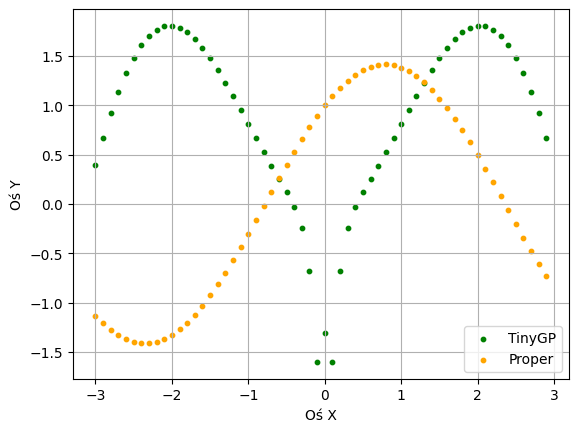

In [32]:
# plotowanie_jednoargumentowe(-3.14,3.14, x, 2)
x, y_gp, y_original = plotowanie_jednoargumentowe(-3.14,3.14, x, 2)

plt.grid(True)
plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
plt.scatter(x, y_original, color='orange', label='Proper', s=10)
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.legend()
# nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
# plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
plt.show()